# 1. _Rod Cutting_

Se requiere conocer la manera óptima de cortar una varilla de manera de maximizar la ganancia (donde cada largo de corte tiene un precio asociado).

**Entrada**: Vector de precios, donde arr[0] es el precio de un corte de largo 1, arr[1] es el de largo 2 y así hasta arr[n-1] que es el precio del corte de largo $n$; valor $n$, que corresponde al largo de la varilla.

**Salida**: Valor de retorno óptimo $r_n$, resultante luego de cortar la varilla y vender sus partes.

## 1.1 _Rod Cutting_ con implementación Recursiva

In [1]:
# Pseudocódigo: p. 363 Introduction to Algorithms 3rd Edition
def rodCutN(arr, size, verbose=False):
    global c
    c += 1
    cortes = 0
    if size == 0: return 0, 0 # Caso base
    q = float("-inf")

    # Se calcula r_n = max(p_i + r_(n-i)), suma que maximiza el valor, recursivamente
    for i in range(1, size + 1):
        a, _ = rodCutN(arr, size-i, verbose)
        tmp = arr[i-1] + a
        if q < tmp:
            q = tmp
            cortes = i
    if verbose:
        print(f'Valor de q: {q}')
        print(f'Cortes: {cortes}')
    return q, cortes

In [2]:
arr = [1, 5, 8, 9, 10, 17, 17, 20]
size = len(arr)
c = 0
q, cortes = rodCutN(arr, size)
print(f'\nGanancia maximizada: {q}')
print(f'Llamadas recursivas: {c}')
print(f'Cortes: {cortes}')


Ganancia maximizada: 22
Llamadas recursivas: 256
Cortes: 2


## 2. _Rod Cutting_ con Programación Dinámica

In [3]:
def extendedRodCut(arr, size, verbose=False):
    r = [0 for x in range(size+1)] # Lista de resultados
    s = [0 for x in range(size+1)] # Lista de resultados

    # Bloque for resuelve cada subproblema de tamaño j, con j=1, 2, ..., n
    # en orden creciente. Se almacena el valor calculado en la posición r[j]
    # para ser usado en el siguiente cálculo de subproblema y se almacena el
    # número de cortes para maximizar el valor
    for j in range(1, size+1):
        q = float('-inf')
        for i in range(j):
            tmp = arr[i] + r[j-i-1]
            if q < tmp:
                q = tmp
                s[j] = i
                if verbose:
                    print(f'Valor de q: {q}')
                    print(f'Cortes: {s[j]}')
        r[j] = q
        if verbose:
            print(f'valor del subproblema {j}: {r[j]}')
    return r[size], s[size]

In [4]:
arr = [1, 5, 8, 9, 10, 17, 17, 20]
size = len(arr)
precio, cortes = extendedRodCut(arr, size)
print(f'\nGanancia maximizada: {precio}')
print(f'\nCortes: {cortes}')


Ganancia maximizada: 22

Cortes: 1


# 3. Algoritmos con `verbose=True`

In [5]:
arr = [1, 5, 8, 9, 10, 17, 17, 20]
size = len(arr)
c = 0
q, cortes = rodCutN(arr, size, True)
print(f'\nGanancia maximizada: {q}')
print(f'Llamadas recursivas: {c}')
print(f'Cortes: {cortes}')

Valor de q: 1
Cortes: 1
Valor de q: 5
Cortes: 2
Valor de q: 1
Cortes: 1
Valor de q: 8
Cortes: 3
Valor de q: 1
Cortes: 1
Valor de q: 5
Cortes: 2
Valor de q: 1
Cortes: 1
Valor de q: 10
Cortes: 2
Valor de q: 1
Cortes: 1
Valor de q: 5
Cortes: 2
Valor de q: 1
Cortes: 1
Valor de q: 8
Cortes: 3
Valor de q: 1
Cortes: 1
Valor de q: 5
Cortes: 2
Valor de q: 1
Cortes: 1
Valor de q: 13
Cortes: 2
Valor de q: 1
Cortes: 1
Valor de q: 5
Cortes: 2
Valor de q: 1
Cortes: 1
Valor de q: 8
Cortes: 3
Valor de q: 1
Cortes: 1
Valor de q: 5
Cortes: 2
Valor de q: 1
Cortes: 1
Valor de q: 10
Cortes: 2
Valor de q: 1
Cortes: 1
Valor de q: 5
Cortes: 2
Valor de q: 1
Cortes: 1
Valor de q: 8
Cortes: 3
Valor de q: 1
Cortes: 1
Valor de q: 5
Cortes: 2
Valor de q: 1
Cortes: 1
Valor de q: 17
Cortes: 6
Valor de q: 1
Cortes: 1
Valor de q: 5
Cortes: 2
Valor de q: 1
Cortes: 1
Valor de q: 8
Cortes: 3
Valor de q: 1
Cortes: 1
Valor de q: 5
Cortes: 2
Valor de q: 1
Cortes: 1
Valor de q: 10
Cortes: 2
Valor de q: 1
Cortes: 1
Valor de q:

In [6]:
arr = [1, 5, 8, 9, 10, 17, 17, 20]
size = len(arr)
precio, cortes = extendedRodCut(arr, size, True)
print(f'\nGanancia maximizada: {precio}')
print(f'\nCortes: {cortes}')

Valor de q: 1
Cortes: 0
valor del subproblema 1: 1
Valor de q: 2
Cortes: 0
Valor de q: 5
Cortes: 1
valor del subproblema 2: 5
Valor de q: 6
Cortes: 0
Valor de q: 8
Cortes: 2
valor del subproblema 3: 8
Valor de q: 9
Cortes: 0
Valor de q: 10
Cortes: 1
valor del subproblema 4: 10
Valor de q: 11
Cortes: 0
Valor de q: 13
Cortes: 1
valor del subproblema 5: 13
Valor de q: 14
Cortes: 0
Valor de q: 15
Cortes: 1
Valor de q: 16
Cortes: 2
Valor de q: 17
Cortes: 5
valor del subproblema 6: 17
Valor de q: 18
Cortes: 0
valor del subproblema 7: 18
Valor de q: 19
Cortes: 0
Valor de q: 22
Cortes: 1
valor del subproblema 8: 22

Ganancia maximizada: 22

Cortes: 1


## 2.1. Descripción del algoritmo

Se crea un vector de ceros en el que se almacenarán los resultados. Luego, por cada iteración se creará una variable $q=-∞$ que se usará para comparar después. r[0] valdrá 0 porque una varilla de largo 0 no entrega ganancia, por lo que las iteraciones comienzan en 1. Se itera sobre otra variable, con la que, usando la primera, se opera sobre el arreglo de entrada: suma el valor de arr[i] con el de r[j-i-1], que es el arreglo de resultados, y esa suma la compara con el valor de $q$ para almacenar el máximo entre ellos. Cuando almacena la suma máxima, también asigna el valor de $i$ al arreglo en la posición s[i], que guarda los cortes necesarios.

Finalmente, el algoritmo entrega como resultado el último elemento de los arreglos r y s.

# 4. Correctitud implementación Bottom-Up

_Teorema: el algoritmo Rod Cutting en su implementación Bottom-Up entrega correctamente el valor que maximiza el precio de cortar una varilla de largo $n$_.

**Caso base**: con $n=0$ el algoritmo retorna 0, que representa que el largo 0 tiene un valor 0.

**Caso general**: antes de la iteración $j+1$, los resultados anteriores están almacenados en $r$ correctamente. Durante la iteración se resuelven los casos $P_1+r_j$, $P_2+r_{j-1}$, ..., $P_{j-1}+r_1$, donde se escoge correctamente la suma mayor y se almacena en $r[j+1]$ para su posterior uso en la iteración $j+2$.

# 5. Tiempo de ejecución

Se puede notar en la implementación Bottom-Up que hay 2 ciclos _for_: uno que va desde 1 hasta n y otro desde 1 hasta el contador del ciclo externo. La combinación de ambos forma una serie aritmética de la siguiente forma:

$∑\limits_{j=1}^nj \cdot c$

Al desarrollar esta serie obtenemos $\frac{n(n-1)}{2}$ lo que implica una complejidad temporal $O(n^2)$.

# 6. Experimentos

## 6.1. Comparación del tiempo de ejecución de ambas implementaciones

In [7]:
import datetime
import matplotlib.pyplot as plt
import random
from math import log
from timeit import repeat

%matplotlib inline

In [8]:
def cutrod_instance_gen(n):
    A = list()
    prev = 0
    for i in range(n):
        r = random.randint(0, 10)
        A.append(prev+r)
        prev += r
    return A

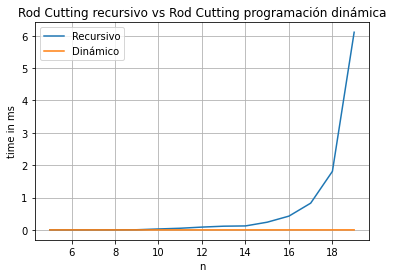

In [9]:
x = []
y = []

x2 = []
y2 = []

# Recomiendo no aumentar el rango, porque el tiempo de ejecución se dispara
# ,uy rápido (con un rango hasta 50 se estaba demorando más de 1 hora así que
# lo detuve). La versión dinámica es menos compleja, por lo que en el siguiente
# experimento aumento mucho el rango para obtener un mejor gráfico
for n in range(5,20):
    a = cutrod_instance_gen(n)
    t = repeat(setup="from __main__ import rodCutN", stmt=f"rodCutN({a}, {len(a)})", repeat=1, number=10)
    x.append(n)
    y.append(t)

for n2 in range(5,20):
    a2 = cutrod_instance_gen(n)
    t2 = repeat(setup="from __main__ import extendedRodCut", stmt=f"extendedRodCut({a2}, {len(a2)})", repeat=1, number=10)
    x2.append(n2)
    y2.append(t2)

plt.plot(x, y)
plt.plot(x2, y2)
plt.legend(["Recursivo", "Dinámico"])

plt.xlabel('n')
plt.ylabel('time in ms')
plt.title("Rod Cutting recursivo vs Rod Cutting programación dinámica")

plt.grid()
plt.show()

Se puede apreciar en el gráfico que la implementación recursiva crece notoriamente más rápido que la dinámica: la primera es de orden exponencial y la segunda es polinómica.

## 6.2. Cantidad de problemas a resolver con Bottom-Up a medida que crece $n$

In [10]:
def counterRodCut(arr, size, counter, verbose=False):
    r = [0 for x in range(size+1)] # Lista de resultados
    s = [0 for x in range(size+1)] # Lista de resultados

    # Bloque for resuelve cada subproblema de tamaño j, con j=1, 2, ..., n
    # en orden creciente. Se almacena el valor calculado en la posición r[j]
    # para ser usado en el siguiente cálculo de subproblema y se almacena el
    # número de cortes para maximizar el valor
    for j in range(1, size+1):
        q = float('-inf')
        for i in range(j):
            tmp = arr[i] + r[j-i-1]
            counter += 1
            if q < tmp:
                q = tmp
                s[j] = i
                if verbose:
                    print(f'Valor de q: {q}')
                    print(f'Cortes: {s[j]}')
        r[j] = q
        if verbose:
            print(f'valor del subproblema {j}: {r[j]}')
    return counter

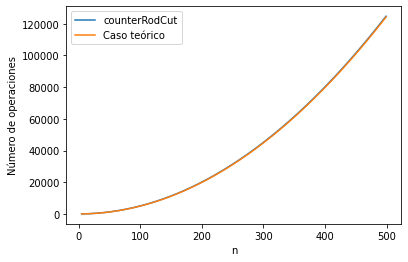

In [11]:
x = [n for n in range(5, 500)]
y1 = [n*(n-1)/2 for n in range(5, 500)]
y = []

for n in range(5, 500):
    a = cutrod_instance_gen(n)
    c = counterRodCut(a, len(a), 0)
    y.append(c)

plt.plot(x, y)
plt.plot(x, y1)
plt.legend(["counterRodCut", "Caso teórico"])

plt.xlabel("n")
plt.ylabel("Número de operaciones")
plt.show()

Se puede notar en el gráfico que la cantidad de operaciones que realiza la implementación dinámica de _Rod Cutting_ calza con su tiempo de ejecución teórico: $\frac{n(n-1)}{2}$, o lo mismo que $O(n^2)$.